# Machine learning techniques for diagnosis of malignant pleural mesothelioma

MPM is a highly aggressive tumor of the serous membranes, which in humans results from exposure to **asbestos** and **asbestiform fibers**. It is a fatal cancer and a malignancy that is resistant to the common tumor directed therapies.

Overall: 
* around half of people diagnosed with mesothelioma will live at least a year after the diagnosis
* around 10% of people with mesothelioma will live at least 5 years after diagnosis

The symptoms of mesothelioma develop usually gradually over time and don't appear until several decades (typically 20 years) after exposure to asbestos ! For mesothelioma in the lining of the lungs, they include :
* chest pain
* shortness of breath
* fatigue
* fever and sweating
* couch
* loss of appetite and unexplained weight loss
* swollen fingertips

As for mesothelioma in the lining of the tummy, they include :
* swelling or tummy pain
* feeling sick
* loss of appetite and unexplained weight loss
* diarrhoea or consitupation

Diagnostics of mesothelioma:
* X-ray of chest or tummy
* CT scan
* fluid drainage
* thoracoscopy or laparoscopy

## Findings in the paper studied

The paper compares the results of the multilayer neural network (MLNN) structure and Artificial Immune Systems (AIS) on MPM diagnosis. The dataset used comes from a faculty of medecine's database using patient's hospital reports. This dataset includes 324 patients suffering from variety of MPM disease. Each of them have 34 features and diagnostic tests of each patient were recorded by an attending physician.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from mca import MCA # pip install --user mca
# doc: https://github.com/esafak/mca/blob/master/docs/usage.rst

# configuration bibliotheque pour les graphiques
%matplotlib inline 

os.getcwd()

'/Users/romanelgff/Documents/Master/M2/S1/R1/ML/ml-mesothelioma'

In [11]:
df = pd.read_excel("mesothelioma_dataset.xlsx")
df = df.drop(columns = ["diag_method"]) # variable correlee avec la variable explicative donc a enlever (d'apres Valérie)
df.head()

,age,gender,city,asbestos_exp,MM_type,asbestos_exp_dur,keep_side,cytology,symptoms_dur,dyspnoea,...,pleural_dehydrogenise,pleural_protein,pleural_albumin,pleural_glucose,dead,pleural_effusion,pleural_tomography,pleuralPh,CRP,diagnosis
0,47.0,1,0,1,0.0,20.0,0,1,24.0,1,...,289.0,0.0,0.00,79.0,1,0.0,0.0,0.0,34,1
1,55.0,1,0,1,0.0,45.0,0,0,1.0,1,...,7541.0,1.6,0.80,6.0,1,1.0,1.0,1.0,42,1
2,29.0,1,1,1,0.0,23.0,1,0,1.0,0,...,480.0,0.0,0.00,90.0,1,0.0,0.0,0.0,43,2
3,39.0,1,0,1,0.0,10.0,0,0,3.0,0,...,459.0,5.0,2.80,45.0,1,1.0,0.0,0.0,21,1
4,47.0,1,0,1,0.0,10.0,1,1,1.5,1,...,213.0,3.6,1.95,53.0,1,1.0,0.0,0.0,11,1


In [12]:
# dimensions
df.shape 

(324, 34)

In [13]:
# nombre total d'éléments
df.size

11016

In [14]:
# noms des colonnes
df.columns

Index(['age', 'gender', 'city', 'asbestos_exp', 'MM_type', 'asbestos_exp_dur',
       'keep_side', 'cytology', 'symptoms_dur', 'dyspnoea', 'chest_ache',
       'weakness', 'cigarette', 'perf_status', 'white_blood', 'WBC', 'HGB',
       'PLT', 'sedimentation', 'LDH', 'ALP', 'total_protein', 'albumin',
       'glucose', 'pleural_dehydrogenise', 'pleural_protein',
       'pleural_albumin', 'pleural_glucose', 'dead', 'pleural_effusion',
       'pleural_tomography', 'pleuralPh', 'CRP', 'diagnosis'],
      dtype='object')

In [15]:
# types des colonnes
df.dtypes

age                      float64
gender                     int64
city                       int64
asbestos_exp               int64
MM_type                  float64
asbestos_exp_dur         float64
keep_side                  int64
cytology                   int64
symptoms_dur             float64
dyspnoea                   int64
chest_ache                 int64
weakness                   int64
cigarette                  int64
perf_status                int64
white_blood              float64
WBC                        int64
HGB                        int64
PLT                      float64
sedimentation            float64
LDH                      float64
ALP                      float64
total_protein            float64
albumin                  float64
glucose                  float64
pleural_dehydrogenise    float64
pleural_protein          float64
pleural_albumin          float64
pleural_glucose          float64
dead                       int64
pleural_effusion         float64
pleural_to

* **age**: âge de l'individu 
* **gender**: genre 
* **city**: si l'individu habite en ville
* **asbestos exposure**: exposition à l'amiante, un silicate fibreux d’origine naturelle
* **type of MM**: type de mésothéliomes malins (trois types)
* **duration of asbetos exposure**: durée d'exposition à l'amiante
* **diagnosis method**: méthode/procédé de diagnostic (0 ou 1?)
* **keep side**: ??? garder de côté le patient?
* **cytology**: dépistage par cytologie (= étude des cellules isolées)
* **duration of symptoms**: durée des symptômes
* **dyspnoea**: présence ou non de dyspnée (souffle court)
* **ache on chest**: présence ou non d'une douleur à la poitrine 
* **weakness**: faiblesse (ou non)
* **habit of cigarette**: fumeur (ou non)
* **performance status**: statut de performance??
* **White Blood cell count (WBC)**: quantité de globule blanc
* **haemoglobin (HGB)**: 0 ou 1 = anémie ou non??
* **platelet count (PLT)**: nombre de plaquettes (thrombocytes) (low platelet concentration is called thrombocytopenia, and is due to either decreased production or increased destruction. Elevated platelet concentration is called thrombocytosis, and is either congenital, reactive (to cytokines), or due to unregulated production)
* **sedimentation**:  sedimentation rate = blood test that checks for inflammation in your body (measures how fast red blood cells fall to the bottom of a tube. Inflammation creates proteins that make red blood cells fall more quickly)
* **blood lactic dehydrogenise (LDH)**: taux de LDH ou Lactate déshydrogénase (type de protéine aussi appelé enzyme), quand des tissus sont endommagés ou malades, ils relâchent des isoenzymes de LDH dans le sang => le type de LDH rejetté dépend du tissu endommagé
* **alkaline phosphatise (ALP)**: enzyme présente dans le sang, si le taux présent est élevé => problème éventuel = foie, hépatite, obstruction des voies biliaires, cirrhose ou problèmes au niveau des os
* **total protein**: quantité totale de protéine (albumin+globulin) dans le sang (normal values = 6.0 to 8.3 grams per deciliter)
* **albumin**:
* **glucose**:
* **pleural lactic dehydrogenise**:
* **pleural protein**:
* **pleural albumin**:
* **pleural glucose**:
* **dead or not**:
* **pleural effusion**:
* **pleural thickness on tomography**:
* **pleural level of acidity (pH)**
* **C-reactive protein (CRP)**:

In [17]:
df["gender"] = pd.Categorical(df["gender"], ordered=False)
df["city"] = pd.Categorical(df["city"], ordered=False)
df["asbestos_exp"] = pd.Categorical(df["asbestos_exp"], ordered=False)
df["MM_type"] = pd.Categorical(df["MM_type"], ordered=False)
#df["diag_method"] = pd.Categorical(df["diag_method"], ordered=False)
df["keep_side"] = pd.Categorical(df["keep_side"], ordered=False)
df["cytology"] = pd.Categorical(df["cytology"], ordered=False)
df["dyspnoea"] = pd.Categorical(df["dyspnoea"], ordered=False)
df["chest_ache"] = pd.Categorical(df["chest_ache"], ordered=False)
df["weakness"] = pd.Categorical(df["weakness"], ordered=False)
df["cigarette"] = pd.Categorical(df["cigarette"], ordered=False)
df["perf_status"] = pd.Categorical(df["perf_status"], ordered=False)
df["HGB"] = pd.Categorical(df["HGB"], ordered=False)
df["dead"] = pd.Categorical(df["dead"], ordered=False)
df["pleural_tomography"] = pd.Categorical(df["pleural_tomography"], ordered=False)
df["pleural_effusion"] = pd.Categorical(df["pleural_effusion"], ordered=False)
df["pleuralPh"] = pd.Categorical(df["pleuralPh"], ordered=False)
df["diagnosis"] = pd.Categorical(df["diagnosis"], ordered=False)

In [18]:
pd.crosstab(df["diagnosis"],df["dead"]) # + de healthy (diagnosis=1) qui meurent que de mesotholmia, strange

dead,0,1
diagnosis,,
1,14,214
2,4,92


In [19]:
df["MM_type"].unique()

[0.0, 1.0, 2.0]
Categories (3, float64): [0.0, 1.0, 2.0]

In [20]:
df["pleuralPh"].unique()

[0.0, 1.0]
Categories (2, float64): [0.0, 1.0]

In [21]:
df["keep_side"].unique() # ??? qu'est-ce?

[0, 1, 2]
Categories (3, int64): [0, 1, 2]

In [35]:
df["cytology"].unique()

[1, 0]
Categories (2, int64): [1, 0]

In [23]:
# mis en place indicatrices au cas où, pour que la fonction MCA repère bien les variables catégorielles
dc = pd.DataFrame(pd.get_dummies(df.drop('diagnosis', axis=1)))
dc.head()

,age,asbestos_exp_dur,symptoms_dur,white_blood,WBC,PLT,sedimentation,LDH,ALP,total_protein,...,HGB_0,HGB_1,dead_0,dead_1,pleural_effusion_0.0,pleural_effusion_1.0,pleural_tomography_0.0,pleural_tomography_1.0,pleuralPh_0.0,pleuralPh_1.0
0,47.0,20.0,24.0,8050.0,9,274.0,60.0,258.0,65.0,7.0,...,0,1,0,1,1,0,1,0,1,0
1,55.0,45.0,1.0,11200.0,7,615.0,86.0,531.0,97.0,5.4,...,1,0,0,1,0,1,0,1,0,1
2,29.0,23.0,1.0,5300.0,12,189.0,30.0,203.0,72.0,7.0,...,0,1,0,1,1,0,1,0,1,0
3,39.0,10.0,3.0,7910.0,14,462.0,28.0,197.0,50.0,8.0,...,0,1,0,1,0,1,1,0,1,0
4,47.0,10.0,1.5,9120.0,4,530.0,71.0,181.0,60.0,6.2,...,1,0,0,1,0,1,1,0,1,0


In [46]:
mca_res = MCA(dc, benzecri=False) # disabling benzecri correction 
print(mca_res.L) # eigenvalues of the factors
print(mca_res.inertia, sum(mca_res.L)) # inertia

[0.04639127 0.01652515 0.00655696 0.00449344 0.00142191 0.00115385
 0.00098095 0.00082999 0.00056077 0.00042685 0.0002774  0.00019049
 0.00018082 0.00014552 0.00014411 0.00013765 0.00012931 0.00012241
 0.00010968 0.0001055  0.00010228 0.00010091]
0.08226755506886388 0.0810872043388823


In [47]:
data = {'Iλ': pd.Series(mca_res.L)}

# 'Indicator Matrix', 'Benzecri Correction', 'Greenacre Correction'
columns = ['Iλ']
table2 = pd.DataFrame(data=data, columns=columns).fillna(0)
table2.index += 1
table2.loc['Σ'] = table2.sum()
table2.index.name = 'Factor'

table2.head() # NUL

,Iλ
Factor,
1,0.046391
2,0.016525
3,0.006557
4,0.004493
5,0.001422


In [24]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [32]:
# essayons une ACP...
X = df.select_dtypes(include='number')
scaler = preprocessing.StandardScaler().fit(X) # creation d'un scaler

X_scaled = pd.DataFrame(scaler.transform(X)) # scaling X
Y = df["diagnosis"]
X_scaled.head() 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.704904,-0.621441,3.939513,-0.408502,-0.167178,-0.420994,-0.492093,-0.275420,-0.033224,0.502317,-0.159627,-0.192962,-0.428559,-2.503893,-2.272308,1.123760,-1.334180
1,0.023319,0.903452,-0.943190,0.505760,-0.765693,1.079865,0.705305,1.201391,0.880472,-1.428726,-1.106574,-0.427312,13.115167,-1.486454,-1.397032,-1.561005,-0.980617
2,-2.343406,-0.438454,-0.943190,-1.206667,0.730595,-0.795108,-1.873705,-0.572947,0.166647,0.502317,0.313847,-0.505429,-0.071850,-2.503893,-2.272308,1.528314,-0.936422
3,-1.433127,-1.231399,-0.518607,-0.449136,1.329110,0.406459,-1.965813,-0.605404,-0.461519,1.709219,1.892092,-0.505429,-0.111069,0.675604,0.791159,-0.126678,-1.908719
4,-0.704904,-1.231399,-0.837044,-0.097943,-1.663465,0.705750,0.014498,-0.691957,-0.175989,-0.463204,0.787320,-0.765819,-0.570495,-0.214655,-0.138822,0.167542,-2.350672


In [37]:
n_components = 6

#PCA
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

sum(pca.explained_variance_ratio_) # sum of the % of variance explained by earch of the selected components

0.5634605521929321

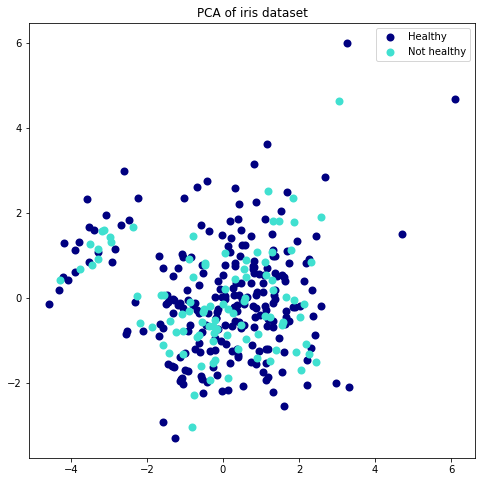

In [36]:
colors = ["navy", "turquoise"]#, "pink"]

plt.figure(figsize=(8, 8))
for color, i, target_name in zip(colors, [1, 2], np.array(["Healthy", "Not healthy"])):
    plt.scatter(
        X_pca[Y == i, 0],
        X_pca[Y == i, 1],
        color=color,
        lw=2,
        label=target_name,
    )

plt.title("PCA of iris dataset")
plt.legend(loc="best", shadow=False, scatterpoints=1)

plt.show() # again: not concluant

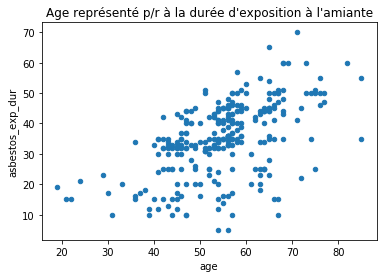

In [57]:
var = df[df["asbestos_exp"] == 1]
var.plot.scatter(title="Age représenté p/r à la durée d'exposition à l'amiante",
         x="age",
         y="asbestos_exp_dur")